# Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Data PreProcessing

In [2]:
gold_df = pd.read_csv('goldprice.csv')

In [3]:
gold_df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [4]:
gold_df.shape

(2290, 6)

In [5]:
gold_df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
# Correlation
c = gold_df.corr()

<AxesSubplot:>

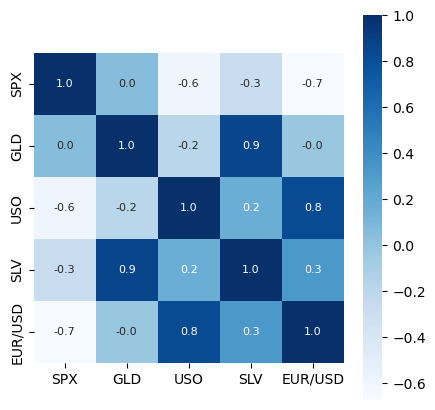

In [10]:
plt.figure(figsize = (5,5))
sns.heatmap(c, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [11]:
# Correlation values of GLD
c['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

C:\Users\91638\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

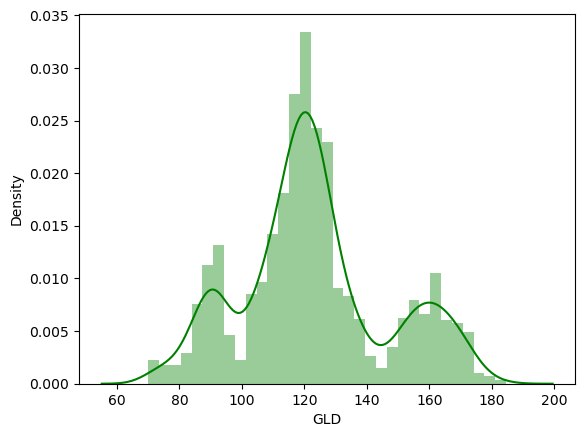

In [13]:
# Distribution of the GLD values
sns.distplot(gold_df['GLD'], color='green')

# Train Test Split

In [14]:
x = gold_df.drop(['Date', 'GLD'], axis=1)

In [15]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [16]:
y = gold_df['GLD']

In [17]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [21]:
x_train.shape

(1832, 4)

In [22]:
x_test.shape

(458, 4)

In [23]:
y_train.shape

(1832,)

In [24]:
y_test.shape

(458,)

# Model Training

In [26]:
model = RandomForestRegressor(n_estimators=100)

In [27]:
model.fit(x_train, y_train)

RandomForestRegressor()

# Model Evaluation

In [28]:
# Accuracy on the train data
x_train_pred = model.predict(x_train)
# R-squared error
r2_score = metrics.r2_score(y_train, x_train_pred)
print(r2_score)
# Mean absolute Error
mse_score = metrics.mean_absolute_error(y_train, x_train_pred)
print(mse_score)

0.9985758914284818
0.47835522754366655


In [29]:
# Accuracy on test data
x_test_pred = model.predict(x_test)
# R-squared error
r2_score = metrics.r2_score(y_test, x_test_pred)
print(r2_score)
# Mean absolute Error
mse_score = metrics.mean_absolute_error(y_test, x_test_pred)
print(mse_score)

0.9880262770428452
1.2767911217903927


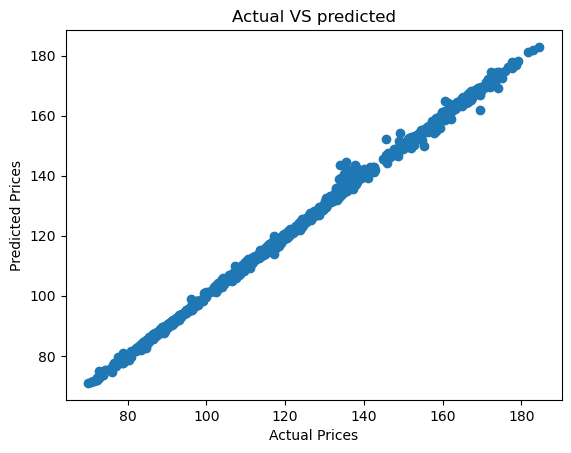

In [30]:
# Visualize the actual prices and predicted prices
plt.scatter(y_train, x_train_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual VS predicted')
plt.show()

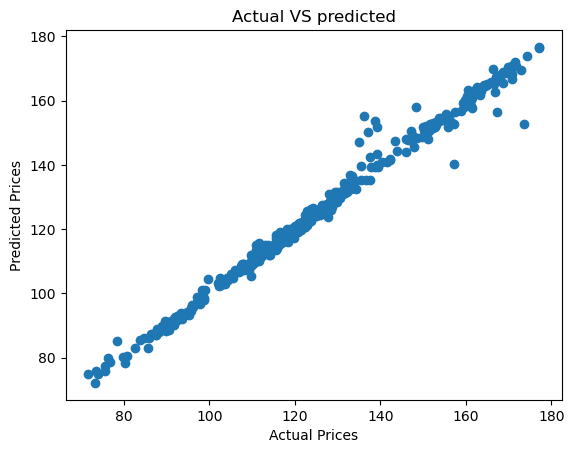

In [31]:
# Visualize the actual prices and predicted prices
plt.scatter(y_test, x_test_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual VS predicted')
plt.show()

In [32]:
# Comparing actual value and predicted value through a graph
y_test = list(y_test)

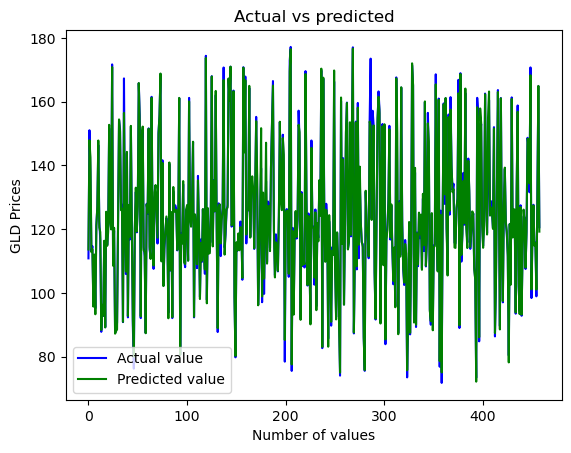

In [34]:
plt.plot(y_test, color='blue', label='Actual value')
plt.plot(x_test_pred, color='green', label='Predicted value')
plt.title('Actual vs predicted')
plt.xlabel('Number of values')
plt.ylabel('GLD Prices')
plt.legend()
plt.show()

In [35]:
# Actual and predicted are almost equal to each other!

# Predictive system

In [36]:
input_data = [1447.160034, 78.470001, 15.1800, 1.471692]
# Changing the ip data to an numpy array
input_array = np.asarray(input_data)
# Reshape the numpy array
input_reshape = input_array.reshape(1,-1)
# Make prediction
prediction = model.predict(input_reshape)
prediction

C:\Users\91638\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([85.03380009])

In [37]:
# The model which we frame is predicted correcty!